# SMAI Assignment - 2

## Question 1: Naive Bayes and Clustering

### Part 1: Naive Bayes

[Files](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing)

You will be performing Sentiment Analysis on a product review dataset with reviews from customers and star rating belonging to four classes (1,2,4,5). You can use sklearn for this question. Your tasks are as follows:

1.   Clean the text by removing punctations and preprocess them using techniques such as stop word removal, stemming etc. You can explore anything!
1.  Create BoW features using the word counts. You can choose the words that form the features such that the performance is optimised. Use the train-test split provided in `train_test_index.pickle` and report any interesting observations based on metrics such as accurarcy, precision, recall and f1 score (You can use Classification report in sklearn).
1. Repeat Task 2 with TfIdf features.

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import string
from nltk.stem import PorterStemmer
import pickle
import numpy as np


with open('train_test_index.pickle', 'rb') as handle:
    train_test_index_dict = pickle.load(handle)

In [5]:
import pandas as pd

data = pd.read_csv('product_reviews.csv')
data.head() 

,text,stars,sentiment
0,Total bill for this horrible service? Over $8G...,1.0,0
1,Went in for a lunch. Steak sandwich was delici...,5.0,1
2,This place has gone down hill. Clearly they h...,1.0,0
3,"Walked in around 4 on a Friday afternoon, we s...",1.0,0
4,Michael from Red Carpet VIP is amazing ! I rea...,4.0,1


In [6]:
for key in train_test_index_dict.keys():
    print(key, len(train_test_index_dict[key]))

train_data = data.iloc[train_test_index_dict['train_index']]
test_data = data.iloc[train_test_index_dict['test_index']]

print((train_data.head()["text"][0:1]))
print(test_data.head())

train_index 17862
test_index 8799
6914    I have been here twice.  Both times the staff ...
Name: text, dtype: object
                                                    text  stars  sentiment
9576   Awesome place for brekky and great service. On...    4.0          1
7281   The location is very convenient very close to ...    2.0          0
22608  It took me 20+ years to find Vicky and I'm nev...    5.0          1
4134   Came the same day!  Honest and you can tell he...    5.0          1
18759  Bad service, Bland Pizza, and really really ov...    2.0          0


In [4]:
def preprocess_text(text):

    def money_to_token(word):
        if word.startswith('$') and len(word) > 1:
            return 'moneytoken'
        return word
    
    def number_to_token(word):
        if word.isdigit():
            return 'numbertoken'
        return word

    text = text.lower()
    text = ' '.join([money_to_token(word.strip()) for word in text.split()])
    text = ' '.join([number_to_token(word) for word in text.split()])
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split()
                    if word not in ENGLISH_STOP_WORDS])
    
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

In [5]:
train_data['text'] = train_data['text'].apply(preprocess_text)
test_data['text'] = test_data['text'].apply(preprocess_text)

/tmp/ipykernel_435876/1167567766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['text'] = train_data['text'].apply(preprocess_text)
/tmp/ipykernel_435876/1167567766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['text'] = test_data['text'].apply(preprocess_text)


In [6]:
train_data.head()

,text,stars,sentiment
6914,twice time staff super friendli help pina cola...,5.0,1
8332,awesom get cpr card realli nice definit taught...,5.0,1
2791,came date night girlfriend sunday busi seat im...,4.0,1
25106,fulton home continu produc high qualiti home j...,5.0,1
11135,jaim ce petit café car nou navon jamai limpres...,4.0,1


In [7]:
X_train = train_data['text']
y_train = train_data['stars']
X_test = test_data['text']
y_test = test_data['stars']

In [8]:
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)


bow_classifier = MultinomialNB()
bow_classifier.fit(X_train_bow, y_train)

y_pred_bow = bow_classifier.predict(X_test_bow)

print("Classification Report for BoW Features:")
print(classification_report(y_test, y_pred_bow))

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

tfidf_classifier = MultinomialNB()
tfidf_classifier.fit(X_train_tfidf, y_train)

y_pred_tfidf = tfidf_classifier.predict(X_test_tfidf)

print("Classification Report for TF-IDF Features:")
print(classification_report(y_test, y_pred_tfidf))

Classification Report for BoW Features:
              precision    recall  f1-score   support

         1.0       0.73      0.74      0.73      1149
         2.0       0.48      0.08      0.14       587
         4.0       0.47      0.48      0.48      1981
         5.0       0.78      0.84      0.81      5082

    accuracy                           0.70      8799
   macro avg       0.61      0.54      0.54      8799
weighted avg       0.68      0.70      0.68      8799

Classification Report for TF-IDF Features:
              precision    recall  f1-score   support

         1.0       0.93      0.12      0.21      1149
         2.0       0.00      0.00      0.00       587
         4.0       0.48      0.01      0.02      1981
         5.0       0.59      1.00      0.74      5082

    accuracy                           0.59      8799
   macro avg       0.50      0.28      0.24      8799
weighted avg       0.57      0.59      0.46      8799



/home/chirag/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/chirag/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/chirag/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Part 2: Clustering

You will be performing kmeans clustering on the same product reviews dataset from Part 1. In this question, instead of statistically computing features, you will use the embeddings obtained from a neural sentiment analysis model (huggingface: siebert/sentiment-roberta-large-english).

You can use sklearn for this question. Your tasks are as follows:


1. Perform kmeans clustering using sklearn. Try various values for number of clusters (k) and plot the elbow curve. For each value of k, plot WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster.
1. Perform task 1 with cluster initialisation methods [k-means++, forgy ("random" in sklearn)].
1. In this case, since the ground truth labels (star rating) are available we can evaluate the clustering using metrics like purity, nmi and rand score. Implement these metrics from scratch and evaluate the clustering. [Reference](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)

In [2]:
import gzip
import numpy as np 

f = gzip.GzipFile('roberta_embeds.npy.gz', "r")
embeds = np.load(f)
print(embeds.shape)

(26661, 1024)


/home/chirag/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/chirag/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/chirag/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/chirag/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

[14015419.042626824, 383779.78270260454, 204916.62139984732, 112261.4787444516, 86921.47505206132, 66230.38868562313, 53232.146172269655, 44411.39121594932, 38042.48435596179, 32138.316300259845]


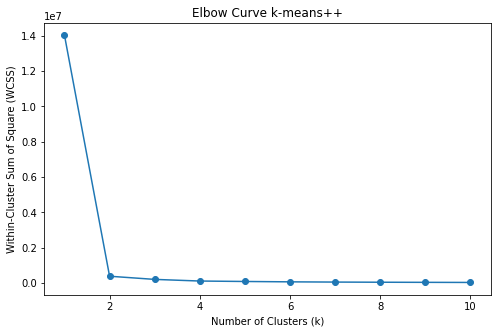

/home/chirag/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/chirag/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/chirag/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/chirag/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

[14015419.042626824, 383779.78270260454, 204916.62139984732, 112261.4787444516, 86921.53297653403, 66230.5229682122, 53234.08435667168, 46916.41485779021, 38095.78833755612, 34136.21858178713]


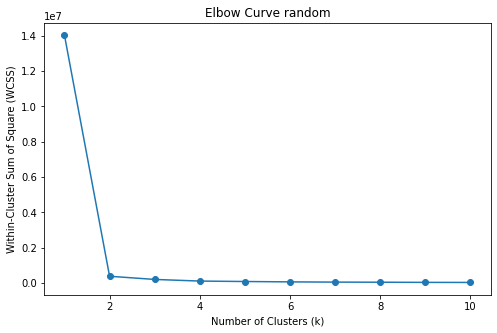

/home/chirag/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Metrics for k=4, Initialization=k-means++:
Purity: 0.7132
NMI: 0.5200
Rand Score: 0.7276


/home/chirag/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Metrics for k=5, Initialization=k-means++:
Purity: 0.7111
NMI: 0.4610
Rand Score: 0.7277


/home/chirag/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Metrics for k=7, Initialization=k-means++:
Purity: 0.7153
NMI: 0.4220
Rand Score: 0.7092


In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pair_confusion_matrix


def plot_elbow_curve(data, max_k=10, init_method='k-means++'):
    wcss = []

    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, init=init_method, random_state=42, n_init='auto')
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    print(wcss)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), wcss, marker='o')
    plt.title(f'Elbow Curve {init_method}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Square (WCSS)')
    plt.show()


def calculate_purity(cluster_labels, true_labels):
    contingency_table = np.zeros(
        (6, len(np.unique(cluster_labels))))

    for i in range(len(cluster_labels)):
        contingency_table[true_labels[i], cluster_labels[i]] += 1

    purity = np.sum(np.max(contingency_table, axis=0)) / len(true_labels)

    return purity

def calculate_entropy(distribution):
    return -np.sum(np.nan_to_num(distribution * np.log2(np.clip(distribution, 1e-10, None))))

def calculate_mutual_information(cluster_labels, true_labels):
    contingency_table = np.zeros(
        (6, len(np.unique(cluster_labels))))

    for i in range(len(cluster_labels)):
        contingency_table[true_labels[i], cluster_labels[i]] += 1

    total_samples = len(true_labels)
    joint_probabilities = contingency_table / total_samples

    p_true = np.sum(joint_probabilities, axis=1)
    p_cluster = np.sum(joint_probabilities, axis=0)

    entropy_true = calculate_entropy(p_true)
    entropy_cluster = calculate_entropy(p_cluster)

    mutual_information = 0.0
    for i in range(6):
        for j in range(len(np.unique(cluster_labels))):
            if joint_probabilities[i, j] > 0.0:
                mutual_information += joint_probabilities[i, j] * np.log2(
                    joint_probabilities[i, j] / (p_true[i] * p_cluster[j]))

    return mutual_information, entropy_true, entropy_cluster

def calculate_normalized_mutual_information(cluster_labels, true_labels):
    mutual_information, entropy_true, entropy_cluster = calculate_mutual_information(
        cluster_labels, true_labels)

    nmi = (2*mutual_information) / (entropy_true + entropy_cluster)
    return nmi

def calculate_rand_score(cluster_labels, true_labels):
    contingency = pair_confusion_matrix(true_labels, cluster_labels)
    numerator = contingency.diagonal().sum()
    denominator = contingency.sum()

    if denominator == 0:
        return 1.0

    return numerator / denominator

def kmeans_clustering(data, k, init_method='k-means++', true_labels=None):
    kmeans = KMeans(n_clusters=k, init=init_method, random_state=42)
    cluster_labels = kmeans.fit_predict(data)

    cluster_labels = cluster_labels.astype(int)
    true_labels = true_labels.astype(int)

    purity = calculate_purity(
        cluster_labels, true_labels)
    nmi = calculate_normalized_mutual_information(cluster_labels, true_labels)
    rand_scor = calculate_rand_score(cluster_labels, true_labels)

    print(f"Metrics for k={k}, Initialization={init_method}:")
    print(f"Purity: {purity:.4f}")
    print(f"NMI: {nmi:.4f}")
    print(f"Rand Score: {rand_scor:.4f}")
    # print(
    #     f"Adjusted Rand Score (lib): {rand_score(true_labels, cluster_labels)}")

    return cluster_labels



init_methods = ['k-means++', 'random']

true_labels = np.array(data['stars'])

for init_method in init_methods:
    plot_elbow_curve(embeds, max_k=10, init_method=init_method)



In [32]:
k_values = [4, 5, 7]
for k in k_values:
    for init_method in init_methods:
        cluster_labels = kmeans_clustering(
            data=embeds, k=k, true_labels=true_labels)

/home/chirag/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Metrics for k=4, Initialization=k-means++:
Purity: 0.7132
NMI: 0.5200
Rand Score: 0.7276


/home/chirag/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Metrics for k=4, Initialization=k-means++:
Purity: 0.7132
NMI: 0.5200
Rand Score: 0.7276


/home/chirag/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Metrics for k=5, Initialization=k-means++:
Purity: 0.7111
NMI: 0.4610
Rand Score: 0.7277


/home/chirag/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Metrics for k=5, Initialization=k-means++:
Purity: 0.7111
NMI: 0.4610
Rand Score: 0.7277


/home/chirag/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Metrics for k=7, Initialization=k-means++:
Purity: 0.7153
NMI: 0.4220
Rand Score: 0.7092


/home/chirag/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Metrics for k=7, Initialization=k-means++:
Purity: 0.7153
NMI: 0.4220
Rand Score: 0.7092
